In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The data is already numeric, so we don't need to convert text to numbers (encoding). Also, there are no missing values, so we don't need to fill in any gaps (imputation).

In [3]:
df.duplicated().sum()

np.int64(723)

In [4]:
df = df.drop_duplicates()

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


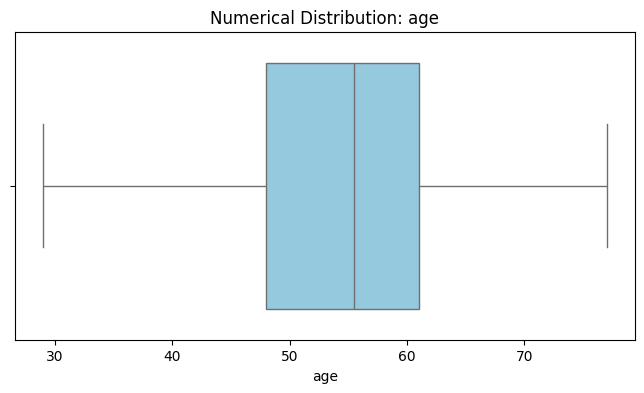

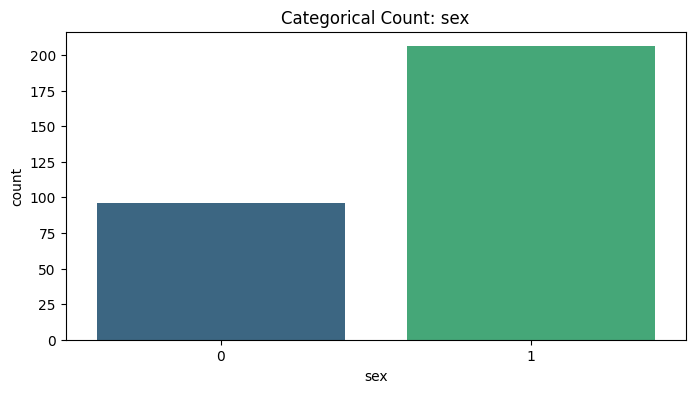

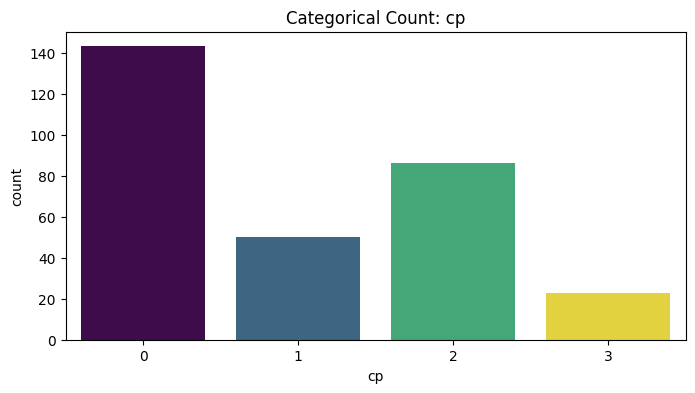

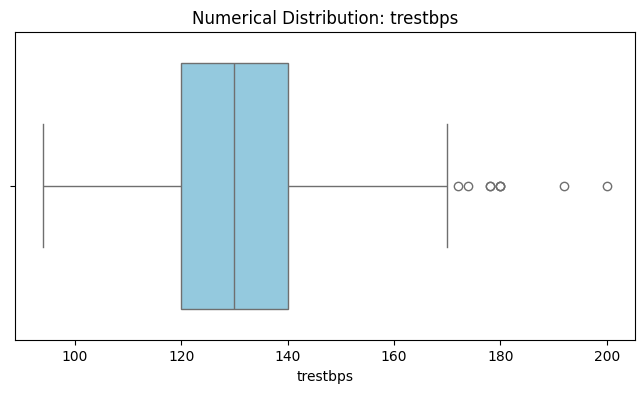

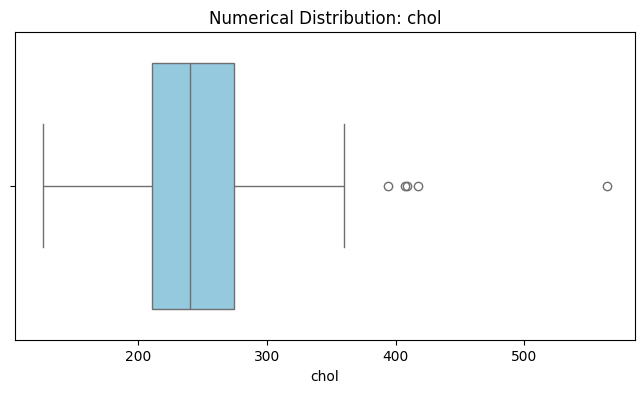

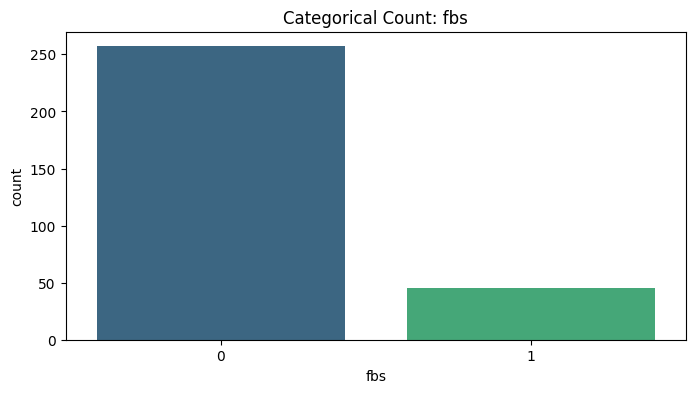

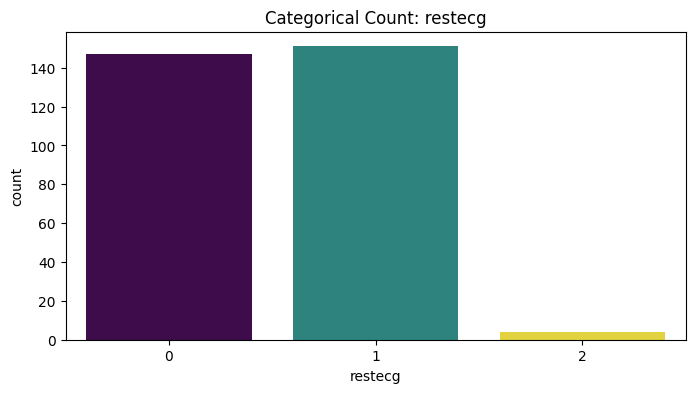

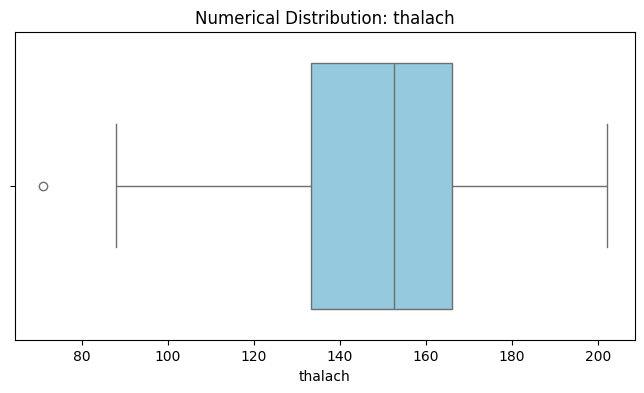

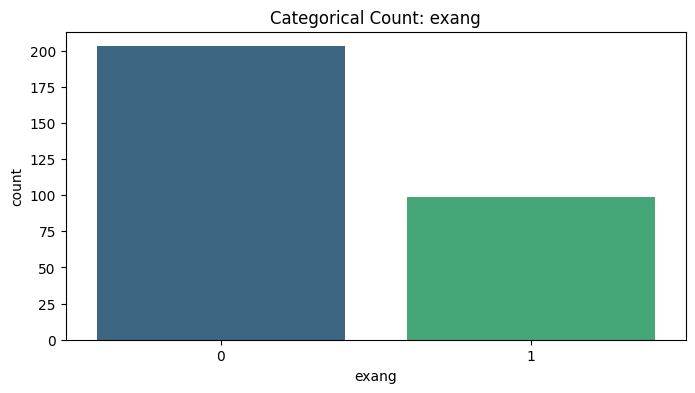

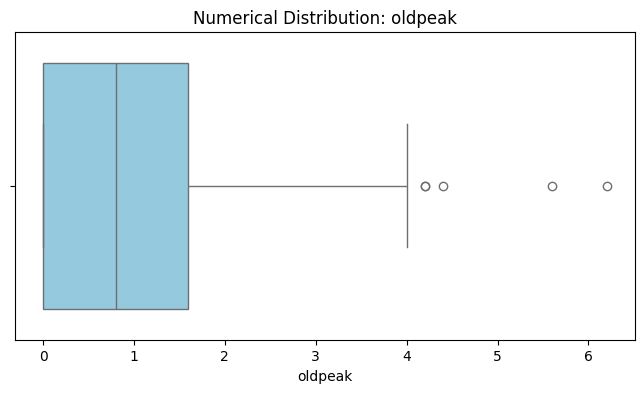

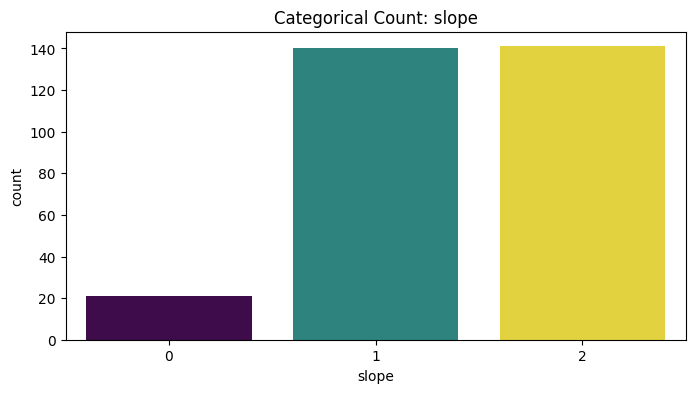

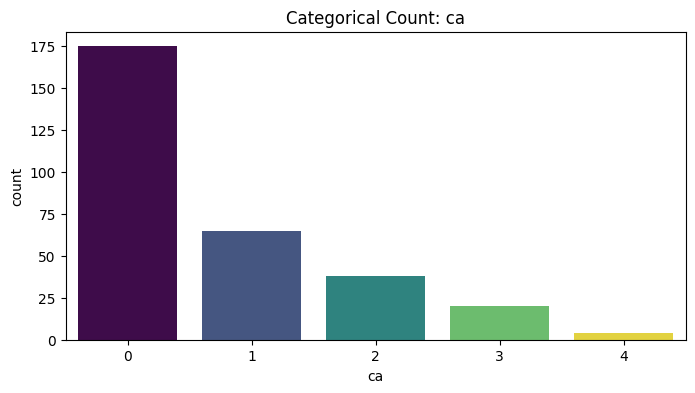

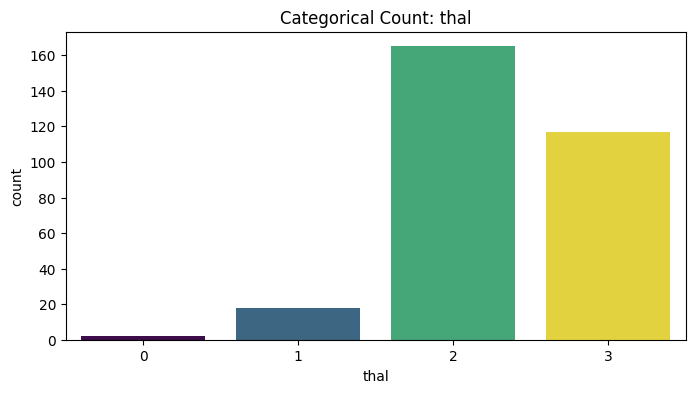

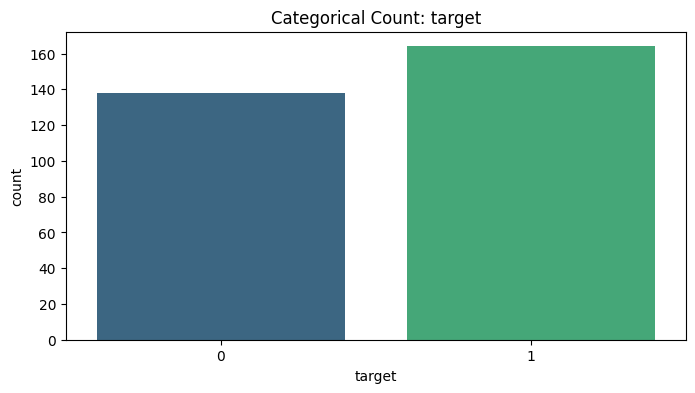

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

for col in df.columns:
    if df[col].nunique() > 5:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Numerical Distribution: {col}")
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=df[col], hue=df[col], palette="viridis", legend=False)
        plt.title(f"Categorical Count: {col}")
        plt.show()

In [8]:
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR  
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Count of outliers in {col} --> ", outliers.shape[0])

Count of outliers in age -->  0
Count of outliers in sex -->  0
Count of outliers in cp -->  0
Count of outliers in trestbps -->  9
Count of outliers in chol -->  5
Count of outliers in fbs -->  45
Count of outliers in restecg -->  0
Count of outliers in thalach -->  1
Count of outliers in exang -->  0
Count of outliers in oldpeak -->  5
Count of outliers in slope -->  0
Count of outliers in ca -->  24
Count of outliers in thal -->  2
Count of outliers in target -->  0


In [9]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

skewness = df[continuous_cols].skew()

print("Skewness of Numerical Columns:")
print(skewness.sort_values(ascending=False))

Skewness of Numerical Columns:
oldpeak     1.266173
chol        1.147332
trestbps    0.716541
age        -0.203743
thalach    -0.532671
dtype: float64


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler",RobustScaler()),
    ("model", LogisticRegression())
])

pipeline.fit(X_train,y_train)

score = pipeline.score(X_test,y_test)
print(f"Model Accuracy with Pipeline: {score:.4f}")

Model Accuracy with Pipeline: 0.8033


In [11]:
print(y.value_counts())
print(y.value_counts(normalize=True))

target
1    164
0    138
Name: count, dtype: int64
target
1    0.543046
0    0.456954
Name: proportion, dtype: float64


In [12]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.73      0.93      0.82        29

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

rf_y_pred = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test,rf_y_pred))
print(f"Overall Accuracy: {rf_accuracy:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[25  7]
 [ 3 26]]
Overall Accuracy: 0.8361


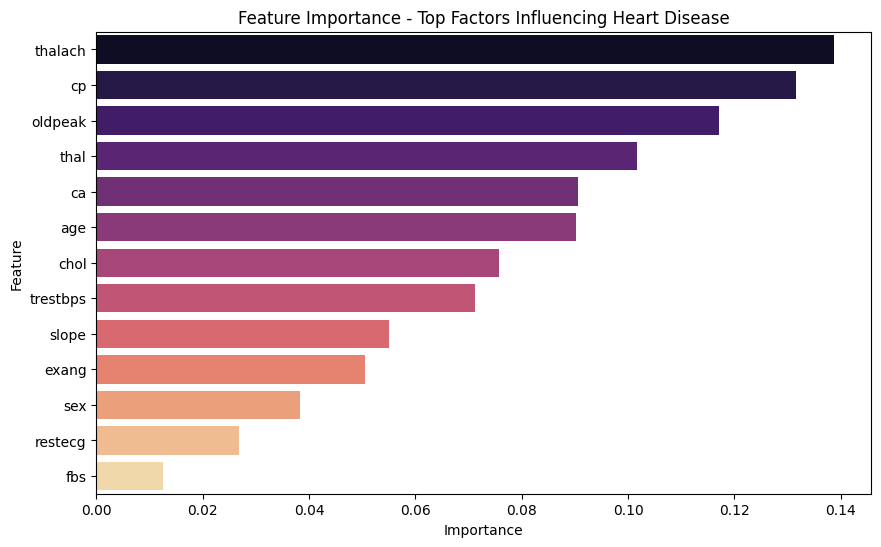

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

model = rf_pipeline.named_steps['model']
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(ascending=False, by='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='magma', legend=False)
plt.title('Feature Importance - Top Factors Influencing Heart Disease')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_pipeline, X, y, cv=5)

print(f"All CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

All CV Scores: [0.83606557 0.80327869 0.9        0.8        0.78333333]
Mean CV Accuracy: 0.8245


In [16]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', XGBClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=3, 
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

xgb_pipeline.fit(X_train, y_train)

xgb_y_pred = xgb_pipeline.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

XGBoost Accuracy: 0.8197


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:01:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost was not selected as the final model because it tends to overfit on small datasets (302 rows)
and performed slightly worse than Random Forest (83.6%).

In [17]:
features_to_keep = [col for col in X.columns if col not in ['fbs', 'restecg']]

X_simplified = X[features_to_keep]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simplified, y, test_size=0.2, random_state=42
)

rf_pipeline.fit(X_train_s, y_train_s)

new_score = rf_pipeline.score(X_test_s, y_test_s)
print(f"Simplified Model Accuracy: {new_score:.4f}")

Simplified Model Accuracy: 0.8361


In [18]:
import joblib

joblib.dump(rf_pipeline, 'heart_disease_model.pkl')

joblib.dump(features_to_keep, 'model_features.pkl')

print("Final model and features are saved!")

Final model and features are saved!


In [22]:
import os

save_path = os.path.join("..", "data", "processed")
os.makedirs(save_path, exist_ok=True)

df.to_csv(os.path.join(save_path, "heart_cleaned.csv"), index=False)